In [1]:

import pandas as pd
%run ../../load_magic/storage.py
%pprint
s = Storage()

url = 'https://www.cdc.gov/flu/weekly/weeklyarchives2019-2020/data/NCHSData20.csv'
flu_df = pd.read_csv(url,
                     usecols=['Year', 'Week', 'Expected', 'Threshold', 'All Deaths', 'Pneumonia Deaths',
                              'Influenza Deaths'],
                     index_col=['Year', 'Week']).sort_index()

Pretty printing has been turned OFF


In [2]:

import matplotlib.pyplot as plt
from datetime import datetime

def show_yearly_chart(column_name):
    def f(year_series):
        year = year_series.index.get_level_values('Year').tolist()[0]
        year_series[column_name].plot.line(ax=ax, label=year)

        return year_series[column_name].max(), year_series[column_name].idxmax()
    
    fig = plt.figure(figsize=(18, 8))
    ax = fig.add_subplot(111, autoscale_on=True)
    year_series = flu_df.groupby('Year').apply(f)
    XTick_obj_list = ax.set_xticks(range(1, 53))
    Text_obj_list = ax.set_xticklabels(range(1, 53))
    Text_obj = ax.set_xlabel('Week Number')
    Text_obj = ax.set_ylabel(column_name)
    Legend_obj = ax.legend()
    kwargs = dict(textcoords='offset points', ha='left', va='bottom',
                  bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                  arrowprops=dict(arrowstyle='->',
                                  connectionstyle='arc3,rad=0'))
    for y, (year, x) in sorted(year_series.tolist(), reverse=True, key=lambda x: x[0])[:2]:
        date_str = f'{year}-W{x}'
        datetime_obj = datetime.strptime(date_str + '-1', "%Y-W%W-%w")
        label = datetime_obj.strftime('%B %d, %Y')
        annotation = plt.annotate(f'{label}', xy=(x-1, y), xytext=(50, -10), **kwargs)

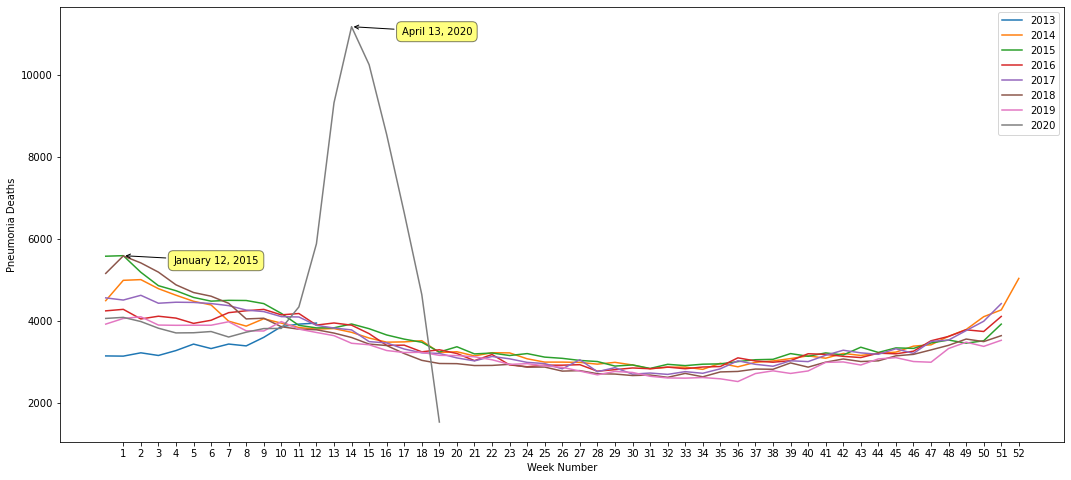

In [3]:

show_yearly_chart('Pneumonia Deaths')

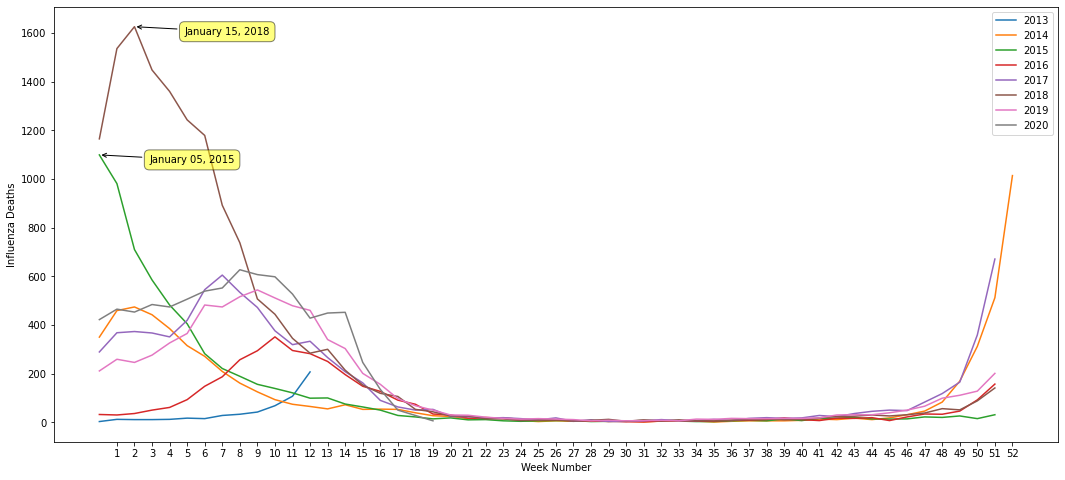

In [4]:

show_yearly_chart('Influenza Deaths')


## Reproduce this plot


![x](https://www.cdc.gov/flu/weekly/weeklyarchives2019-2020/images/NCHS20.gif)

In [6]:

import re

numeric_regex = re.compile('[^\d\.]+')
for column_name in flu_df.columns:
    flu_df[column_name] = flu_df[column_name].map(lambda x: numeric_regex.sub('', str(x)))
    flu_df[column_name] = pd.to_numeric(flu_df[column_name])
    if 'death' in column_name.lower():
        flu_df[column_name] = flu_df[column_name].map(lambda x: int(x))
    else:
        flu_df[column_name] = flu_df[column_name].map(lambda x: float(x))

In [7]:

def f(row_series):
    pdeaths = row_series['Pneumonia Deaths']
    adeaths = row_series['All Deaths']
    
    return 100*pdeaths/adeaths

flu_df['Percentage Pneumonia'] = flu_df.apply(f, axis=1)
print(flu_df.columns.tolist())
flu_df

['Expected', 'Threshold', 'All Deaths', 'Pneumonia Deaths', 'Influenza Deaths', 'Percentage Pneumonia']


Expected  Threshold  All Deaths  Pneumonia Deaths  \
Year Week                                                      
2013 40     6.36132    6.77011       47492              3140   
     41     6.45326    6.86185       47304              3135   
     42     6.55439    6.96279       47602              3216   
     43     6.66322    7.07142       47746              3151   
     44     6.77811    7.18613       48777              3271   
...             ...        ...         ...               ...   
2020 16     6.57010    6.90577       69761             10254   
     17     6.47344    6.80912       63478              8547   
     18     6.37063    6.70630       55566              6633   
     19     6.26317    6.59884       44573              4637   
     20     6.15263    6.48831       20960              1525   

           Influenza Deaths  Percentage Pneumonia  
Year Week                                          
2013 40                   3              6.611640  
     41                  12              6.627347  
     42                  11              6.756019  
     43                  11              6.599506  
     44                  12              6.706029  
...                     ...                   ...  
2020 16                 246             14.698757  
     17                 135             13.464507  
     18                  50             11.937156  
     19                  28             10.403159  
     20                   6              7.275763  

[346 rows x 6 columns]

In [8]:

def f(row_series):
    ideaths = row_series['Influenza Deaths']
    adeaths = row_series['All Deaths']
    
    return 100*ideaths/adeaths

flu_df['Percentage Influenza'] = flu_df.apply(f, axis=1)
print(flu_df.columns.tolist())
flu_df

['Expected', 'Threshold', 'All Deaths', 'Pneumonia Deaths', 'Influenza Deaths', 'Percentage Pneumonia', 'Percentage Influenza']


Expected  Threshold  All Deaths  Pneumonia Deaths  \
Year Week                                                      
2013 40     6.36132    6.77011       47492              3140   
     41     6.45326    6.86185       47304              3135   
     42     6.55439    6.96279       47602              3216   
     43     6.66322    7.07142       47746              3151   
     44     6.77811    7.18613       48777              3271   
...             ...        ...         ...               ...   
2020 16     6.57010    6.90577       69761             10254   
     17     6.47344    6.80912       63478              8547   
     18     6.37063    6.70630       55566              6633   
     19     6.26317    6.59884       44573              4637   
     20     6.15263    6.48831       20960              1525   

           Influenza Deaths  Percentage Pneumonia  Percentage Influenza  
Year Week                                                                
2013 40                   3              6.611640              0.006317  
     41                  12              6.627347              0.025368  
     42                  11              6.756019              0.023108  
     43                  11              6.599506              0.023039  
     44                  12              6.706029              0.024602  
...                     ...                   ...                   ...  
2020 16                 246             14.698757              0.352633  
     17                 135             13.464507              0.212672  
     18                  50             11.937156              0.089983  
     19                  28             10.403159              0.062818  
     20                   6              7.275763              0.028626  

[346 rows x 7 columns]

In [12]:

def f(row_series):
    ideaths = row_series['Influenza Deaths']
    pdeaths = row_series['Pneumonia Deaths']
    adeaths = row_series['All Deaths']
    
    return 100*(ideaths+pdeaths)/adeaths

flu_df['Percentage Both'] = flu_df.apply(f, axis=1)
print(flu_df.columns.tolist())
s.store_objects(flu_df=flu_df)
flu_df

['Expected', 'Threshold', 'All Deaths', 'Pneumonia Deaths', 'Influenza Deaths', 'Percentage Pneumonia', 'Percentage Influenza', 'Percentage Both']
Pickling to /home/jovyan/repos/notebooks/covid19/saves/pickle/flu_df.pickle


Expected  Threshold  All Deaths  Pneumonia Deaths  \
Year Week                                                      
2013 40     6.36132    6.77011       47492              3140   
     41     6.45326    6.86185       47304              3135   
     42     6.55439    6.96279       47602              3216   
     43     6.66322    7.07142       47746              3151   
     44     6.77811    7.18613       48777              3271   
...             ...        ...         ...               ...   
2020 16     6.57010    6.90577       69761             10254   
     17     6.47344    6.80912       63478              8547   
     18     6.37063    6.70630       55566              6633   
     19     6.26317    6.59884       44573              4637   
     20     6.15263    6.48831       20960              1525   

           Influenza Deaths  Percentage Pneumonia  Percentage Influenza  \
Year Week                                                                 
2013 40                   3              6.611640              0.006317   
     41                  12              6.627347              0.025368   
     42                  11              6.756019              0.023108   
     43                  11              6.599506              0.023039   
     44                  12              6.706029              0.024602   
...                     ...                   ...                   ...   
2020 16                 246             14.698757              0.352633   
     17                 135             13.464507              0.212672   
     18                  50             11.937156              0.089983   
     19                  28             10.403159              0.062818   
     20                   6              7.275763              0.028626   

           Percentage Both  
Year Week                   
2013 40           6.617957  
     41           6.652714  
     42           6.779127  
     43           6.622544  
     44           6.730631  
...                    ...  
2020 16          15.051390  
     17          13.677179  
     18          12.027139  
     19          10.465977  
     20           7.304389  

[346 rows x 8 columns]

In [10]:

from datetime import date, timedelta

def monday_of_calenderweek(year, week):
    first = date(year, 1, 1)
    base = 1 if first.isocalendar()[1] == 1 else 8
    return first + timedelta(days=base - first.isocalendar()[2] + 7 * (week - 1))

monday_of_calenderweek(2014, 52), monday_of_calenderweek(2014, 53)

(datetime.date(2014, 12, 22), datetime.date(2014, 12, 29))

In [29]:

%run ../../load_magic/charts.py
dir()

['FACEBOOK_ASPECT_RATIO', 'In', 'Out', 'Storage', 'TWITTER_ASPECT_RATIO', '_', '_10', '_12', '_7', '_8', '_9', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__nonzero__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', '_i27', '_i28', '_i29', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'ax', 'ball_and_chain', 'both_df', 'colormaps_list', 'column_name', 'columns_list', 'csv', 'cycler', 'date', 'datetime', 'exit', 'extended', 'extra_df', 'f', 'fig', 'first_order_linear_scatterplot', 'flu_df', 'get_color_cycler', 'get_inf_nan_mask', 'get_ipython', 'is_first', 'lifted_date', 'lockdown_date', 'mask_series', 'max_date', 'max_pop', 'monday_of_calenderweek', 'np', 'numeric_regex', 'os', 'pd', 'pearsonr', 'pickle', 'plt', 'pop', 'quit', 'r', 'random', 're', 'row_series', 's', 'save_fig_

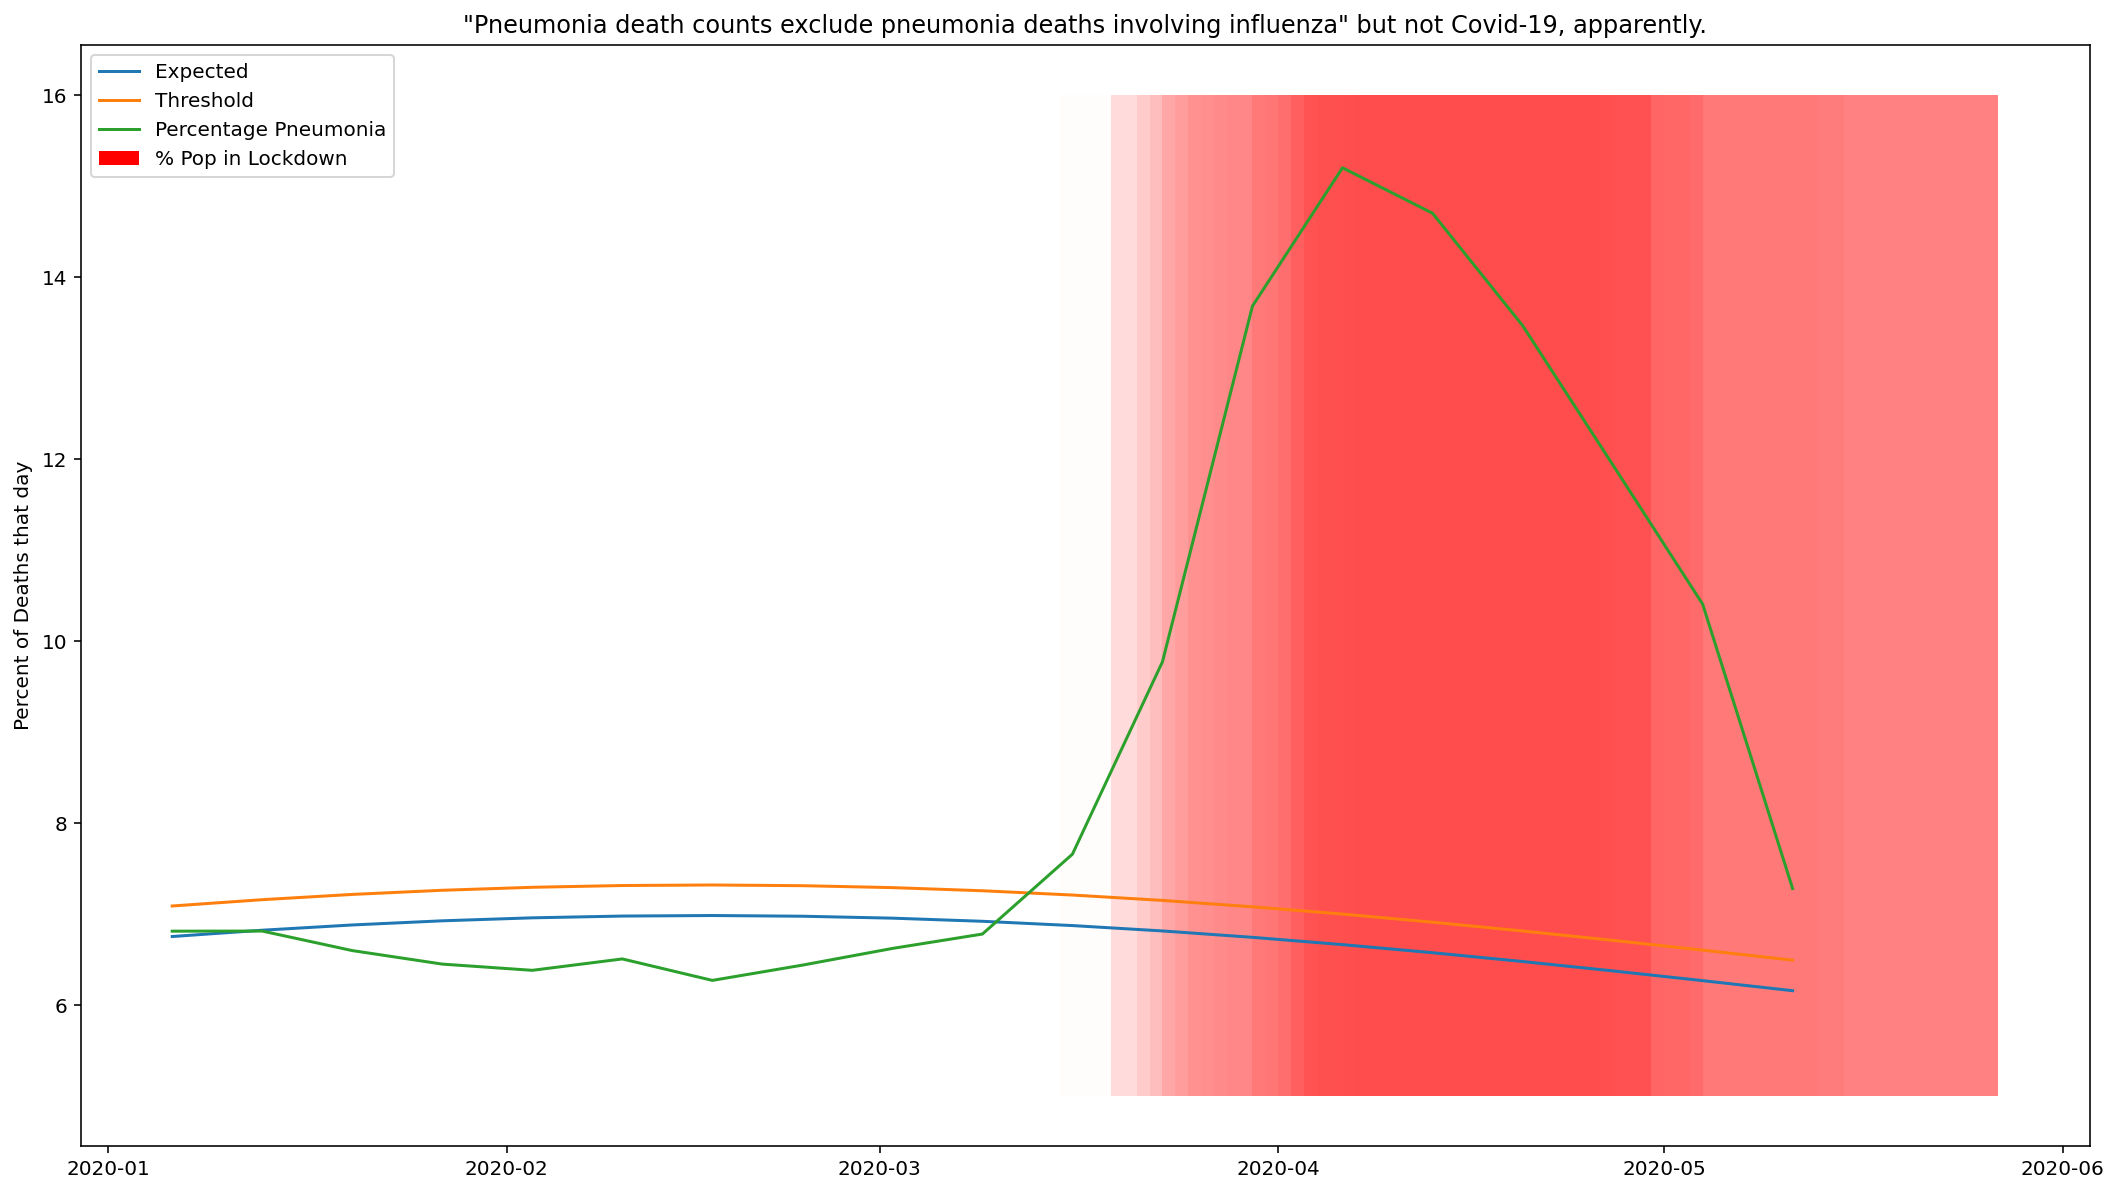

In [35]:

from datetime import date

columns_list = ['Expected', 'Threshold', 'Percentage Pneumonia']
fig = plt.figure(figsize=(18, 18/TWITTER_ASPECT_RATIO))
ax = fig.add_subplot(111, autoscale_on=True)
both_df = s.load_object('flu_df')
both_df.index = pd.Index([monday_of_calenderweek(year, week) for (year, week) in both_df.index])
both_df.index.name = 'date'
mask_series = both_df.index.map(lambda x: x.year == 2020)
both_df[mask_series][columns_list].plot.line(ax=ax)
states_stats_df = s.load_object('states_stats_df')
mask_series = states_stats_df.Population_Estimate_2019.isnull() | states_stats_df.Date_Stay_At_Home_Ordered.isnull()
extra_df = states_stats_df[~mask_series]
max_date = date.today()
max_pop = extra_df.Population_Estimate_2019.sum()
for state_name, row_series in extra_df.sort_values('Date_Stay_At_Home_Ordered').iterrows():
    lockdown_date = row_series.Date_Stay_At_Home_Ordered
    pop = row_series.Population_Estimate_2019
    lifted_date = row_series.Date_Stay_At_Home_Order_Lifted
    if lifted_date is pd.NaT:
        lifted_date = max_date
    extended = pd.date_range(start=lockdown_date,
                             end=lifted_date)
    ax.fill_between(extended, 5, 16, color='r', alpha=pop/max_pop, lw=0, zorder=1)
ax.fill_between(pd.date_range(start=extra_df.Date_Stay_At_Home_Order_Lifted.min(),
                              end=max_date), 5, 5, color='r', lw=0, zorder=0, label='% Pop in Lockdown')
ax.legend(loc='upper left')
ax.set_title('"Pneumonia death counts exclude pneumonia deaths involving influenza" but not Covid-19, apparently.')
ax.set_ylabel('Percent of Deaths that day')
ax.set_xlabel('');

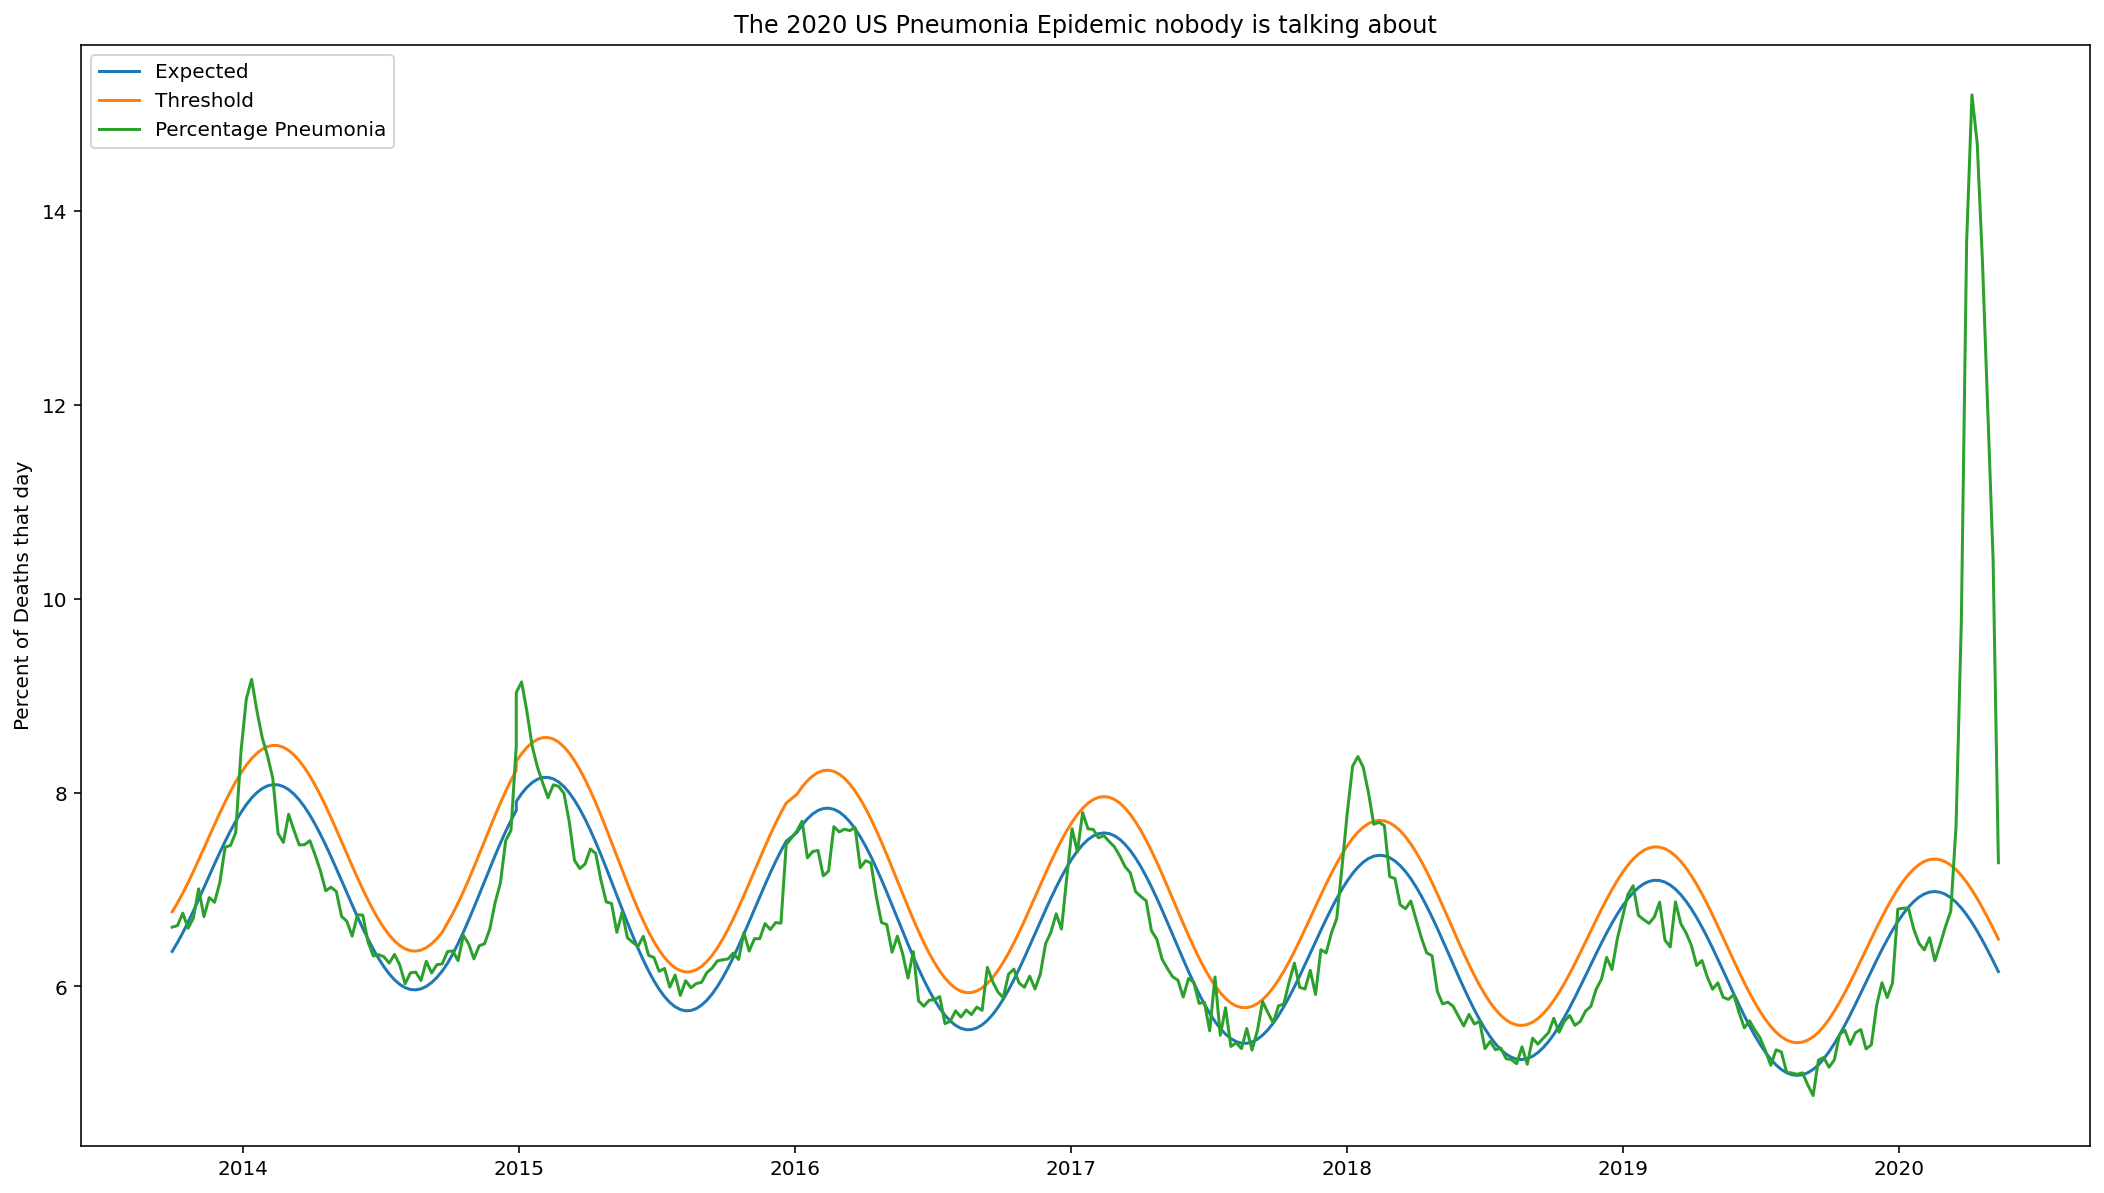

In [34]:

from datetime import date

columns_list = ['Expected', 'Threshold', 'Percentage Pneumonia']
fig = plt.figure(figsize=(18, 18/TWITTER_ASPECT_RATIO))
ax = fig.add_subplot(111, autoscale_on=True)
both_df = s.load_object('flu_df')
both_df.index = pd.Index([monday_of_calenderweek(year, week) for (year, week) in both_df.index])
both_df.index.name = 'date'
both_df[columns_list].plot.line(ax=ax)
ax.legend(loc='upper left')
ax.set_title('The 2020 US Pneumonia Epidemic nobody is talking about')
ax.set_ylabel('Percent of Deaths that day')
ax.set_xlabel('');

In [31]:

# https://stackoverflow.com/questions/22780563/group-labels-in-matplotlib-barchart-using-pandas-multiindex
def cvt_MIdx_tcklab(df):
    Midx_ar = np.array(df.index.tolist())
    Blank_ar = np.char.mod('%d', Midx_ar)
    col_idx = np.arange(Midx_ar.shape[0])
    val, idx = np.unique(Midx_ar[:, 0], return_index=True)
    Blank_ar[idx, 0] = val
    idx = ~np.in1d(col_idx, idx)
    Blank_ar[idx, 0] = ''
    
    return list(map('\n'.join, np.fliplr(Blank_ar)))

In [33]:

import numpy as np
from matplotlib.text import Text

ticklabels_list = [Text(0, 0, Text_str) for Text_str in cvt_MIdx_tcklab(flu_df)]

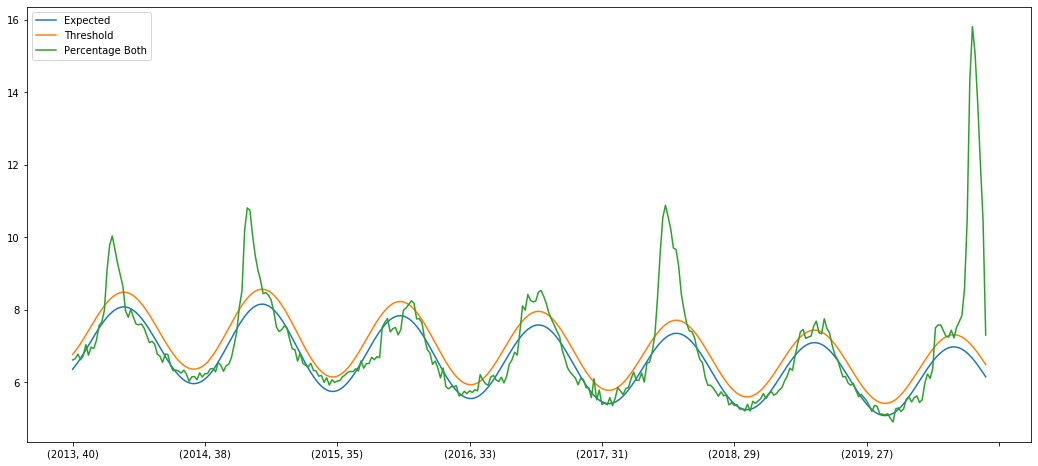

In [213]:

#ax.set_xticks(flu_df.index.get_level_values('Year'), minor=False)
#ax.set_xticks(flu_df.index.get_level_values('Week'), minor=True)
#ax.set_xticklabels(ticklabels_list)
#ax.xaxis.set_minor_locator(MultipleLocator(10));
#old_ticks_list = ax.get_xticks()
#new_ticks_list = [n for n in np.linspace(old_ticks_list.min(), old_ticks_list.max(), len(ticklabels_list))]
#ax.set_xticks(new_ticks_list)
#ticklabels_list = [Text(0, 0, tuple_regex.sub('Year \\g<1>\nWeek \\g<2>',
#                                              xticklabel_obj.get_text())) for xticklabel_obj in ax.get_xticklabels()]
#ax.set_xticklabels(ticklabels_list)
ax.set_xlabel('');
idx_list = states_stats_df[~mask_series].index.tolist()
total_pop = states_stats_df[~mask_series].Population_Estimate_2019.sum()

In [198]:

tuple_regex = re.compile(r'\((\d+), (\d+)\)')
xticklabel_obj = ax.get_xticklabels()[3]
print([f'xticklabel_obj.{fn}' for fn in dir(xticklabel_obj) if 'text' in fn.lower()])
#xticklabel_obj.set_text()


['xticklabel_obj._get_rendered_text_width', 'xticklabel_obj._get_wrapped_text', 'xticklabel_obj._text', 'xticklabel_obj.get_text', 'xticklabel_obj.is_math_text', 'xticklabel_obj.set_text']


'Year 2015\nWeek 35'

In [101]:

states_stats_df = s.load_object('states_stats_df')
columns_list = ['Population_Estimate_2019', 'Date_Stay_At_Home_Ordered', 'Date_Stay_At_Home_Order_Lifted']
states_stats_df[columns_list].sample(5)

,Population_Estimate_2019,Date_Stay_At_Home_Ordered,Date_Stay_At_Home_Order_Lifted
West Region,78347268.0,NaT,NaT
Midwest Region,68329004.0,NaT,NaT
Arizona,7278717.0,2020-03-31,NaT
Mississippi,2976149.0,2020-04-03,2020-04-27
Massachusetts,6892503.0,NaT,NaT


302577350.0

(4.359626738381321, 16.35788114618303)

In [108]:

from datetime import date


[(2020, 14), (2020, 13), (2020, 14), (2020, 12), (2020, 13), (2020, 13), (2020, 13), (2020, 14), (2020, 14), (2020, 14), (2020, 13), (2020, 13), (2020, 12), (2020, 13), (2020, 14), (2020, 13), (2020, 14), (2020, 14), (2020, 13), (2020, 13), (2020, 14), (2020, 15), (2020, 13), (2020, 14), (2020, 13), (2020, 12), (2020, 13), (2020, 12), (2020, 14), (2020, 13), (2020, 13), (2020, 14), (2020, 11), (2020, 13), (2020, 15), (2020, 14), (2020, 14), (2020, 13), (2020, 14), (2020, 13), (2020, 13), (2020, 13)]


----
# Find the state dataframes

In [26]:

columns_set = set()
indexes_set = set()
for file_name in os.listdir(s.saves_pickle_folder):
    if file_name.endswith('_df.pickle'):
        df_name = file_name.split('.')[0]
        try:
            df = eval("s.load_object('{}')".format(df_name))
            indexes_set.add(df.index.name)
            for column_name in df.columns:
                columns_set.add(column_name)
        except ValueError as e:
            message = str(e).strip()
            print(f'Value Error trying to load {df_name}: {message}')

Value Error trying to load states_hospital_capacity_df: unsupported pickle protocol: 5
Value Error trying to load world_hospital_capacity_df: unsupported pickle protocol: 5


In [29]:

[column_name for column_name in columns_set if ('state' in str(column_name).lower()) or ('name' in str(column_name).lower())]

['State_Pension_Fund_Management', 'location_name', 'U_S_And_State_Routes', 'State_Highways', 'Interstate_And_US_Routes', 'County_Name', 'Area_State_Capital_City_And_Borough', 'Government_State_Reps', 'Government_United_States_Representatives', 'State_Routes', 'Census_Bureau_Division_Name', 'state_name', 'Named_For', 'State_Name', 'State_Population', 'State_Abbreviation', 'State_Civil_Service_Management', 'Named', 'country_name', 'state', 'Nicknames', 'Government_State_Assemblyman', 'county_name', 'State_Region', 'Government_State_Senate', 'Census_Bureau_Region_Name', 'State_FIPS', 'State_Budget_Processes', 'Area_State_Capital_And_Consolidated_City_County', 'model_name', 'column_name', 'Interstates']

In [30]:

state_columns_list = ['state_name', 'State_Name', 'State_Population', 'State_Abbreviation', 'state', 'State_FIPS']

In [32]:

[column_name for column_name in indexes_set if ('state' in str(column_name).lower()) or ('name' in str(column_name).lower())]

['State', 'State_Name', 'state_name', 'State_Abbreviation']

In [33]:

state_indexes_list = ['State', 'State_Name', 'state_name', 'State_Abbreviation']

In [34]:

dataframes_list = []
for file_name in os.listdir(s.saves_pickle_folder):
    if file_name.endswith('_df.pickle'):
        df_name = file_name.split('.')[0]
        try:
            df = eval("s.load_object('{}')".format(df_name))
            if df.index.name in state_indexes_list:
                dataframes_list.append(df_name)
                continue
            for column_name in df.columns:
                if column_name in state_columns_list:
                    dataframes_list.append(df_name)
                    continue
        except ValueError as e:
            message = str(e).strip()
            print(f'Value Error trying to load {df_name}: {message}')
        if df_name in dataframes_list:
            print(f"{df_name} = s.load_object('{df_name}')")
            print(f'{df_name}')

counties_df = s.load_object('counties_df')
counties_df
nytimes_covid_19_data_us_states_df = s.load_object('nytimes_covid_19_data_us_states_df')
nytimes_covid_19_data_us_states_df
scraped_counties_df = s.load_object('scraped_counties_df')
scraped_counties_df
states_covid19_df = s.load_object('states_covid19_df')
states_covid19_df
Value Error trying to load states_hospital_capacity_df: unsupported pickle protocol: 5
states_merge_df = s.load_object('states_merge_df')
states_merge_df
states_stats_df = s.load_object('states_stats_df')
states_stats_df
us_states_df = s.load_object('us_states_df')
us_states_df
Value Error trying to load world_hospital_capacity_df: unsupported pickle protocol: 5



----
# Data Scraping

In [12]:

%run ../../load_magic/dataframes.py
tables_url = 'https://en.wikipedia.org/wiki/U.S._state_and_local_government_response_to_the_COVID-19_pandemic'
tables_list = get_page_tables(tables_url)

[(0, (56, 11)), (34, (69, 2)), (1, (18, 3)), (36, (23, 2)), (37, (22, 2)), (56, (12, 2)), (38, (8, 2)), (51, (8, 2)), (45, (7, 2)), (52, (7, 2)), (54, (7, 2)), (46, (6, 2)), (55, (6, 2)), (44, (4, 2)), (47, (4, 2)), (42, (3, 2)), (48, (3, 2)), (49, (3, 2)), (57, (3, 2)), (58, (3, 2)), (50, (2, 2)), (53, (2, 2)), (2, (1, 2)), (3, (1, 2)), (4, (1, 2)), (5, (1, 2)), (6, (1, 2)), (7, (1, 2)), (8, (1, 2)), (9, (1, 2)), (10, (1, 2)), (11, (1, 2)), (12, (1, 2)), (13, (1, 2)), (14, (1, 2)), (15, (1, 2)), (16, (1, 2)), (17, (1, 2)), (18, (1, 2)), (19, (1, 2)), (20, (1, 2)), (21, (1, 2)), (22, (1, 2)), (23, (1, 2)), (24, (1, 2)), (25, (1, 2)), (26, (1, 2)), (27, (1, 2)), (28, (1, 2)), (29, (1, 2)), (30, (1, 2)), (31, (1, 2)), (32, (1, 2)), (33, (1, 2)), (35, (1, 2)), (39, (1, 2)), (40, (1, 2)), (41, (1, 2)), (43, (1, 2)), (59, (1, 2))]


In [65]:

lifted_df = tables_list[1].copy()
#print([word_regex.sub(' ', f'{cn}').title().replace(' ', '_') for cn in lifted_df.columns.tolist()])
lifted_df.columns = ['State_Name', 'Date_Enacted', 'Date_Stay_At_Home_Order_Lifted']
date_format = '%B %d, %Y'
for column_name in lifted_df.columns:
    if 'date' in column_name.lower():
        lifted_df[column_name] = lifted_df[column_name].map(lambda x: datetime.strptime(x.split('[')[0], date_format))
        lifted_df[column_name] = pd.to_datetime(lifted_df[column_name])
    else:
        lifted_df[column_name] = lifted_df[column_name].map(lambda x: x.split('[')[0])
lifted_df.set_index('State_Name', drop=True, inplace=True)
lifted_df

,Date_Enacted,Date_Stay_At_Home_Order_Lifted
State_Name,,
Alabama,2020-04-04,2020-04-30
Colorado,2020-03-26,2020-04-26
Florida,2020-04-03,2020-05-04
Georgia,2020-04-03,2020-04-30
Idaho,2020-03-25,2020-04-30
Indiana,2020-03-25,2020-05-01
Kansas,2020-03-30,2020-05-04
Louisiana,2020-03-30,2020-05-15
Maine,2020-04-02,2020-04-30


In [66]:

import re

word_regex = re.compile('\W+')
lockdowns_df = tables_list[0].copy()
lockdowns_df.columns = ['State_Name', 'State_Name1', 'Date_State_Of_Emergency_Declared', 'Date_Stay_At_Home_Ordered', 'Gatherings_Banned',
                        'Out_Of_State_Travel_Restrictions', 'Closures_Ordered_Schools', 'Closures_Ordered_Daycares',
                        'Closures_Ordered_Bars_Sit_Down_Restaurants', 'Closures_Ordered_Non_Essential_Retail', 'Sources']
columns_list = ['State_Name', 'Date_State_Of_Emergency_Declared', 'Date_Stay_At_Home_Ordered', 'Gatherings_Banned',
                'Out_Of_State_Travel_Restrictions', 'Closures_Ordered_Schools', 'Closures_Ordered_Daycares',
                'Closures_Ordered_Bars_Sit_Down_Restaurants', 'Closures_Ordered_Non_Essential_Retail']
lockdowns_df = lockdowns_df[columns_list]
date_format = '%B %d, %Y'

def f(x):
    x = str(x)
    try:
        result = datetime.strptime(f"{x.split('[')[0]}, 2020", date_format)
    except:
        result = pd.NaT
    
    return result

for column_name in lockdowns_df.columns:
    if column_name in ['Date_State_Of_Emergency_Declared', 'Date_Stay_At_Home_Ordered']:
        lockdowns_df[column_name] = lockdowns_df[column_name].map(f)
        lockdowns_df[column_name] = pd.to_datetime(lockdowns_df[column_name])
    else:
        lockdowns_df[column_name] = lockdowns_df[column_name].map(lambda x: x.split('(')[0].strip())
lockdowns_df.set_index('State_Name', drop=True, inplace=True)
lockdowns_df.sample(5).T

State_Name,Mississippi,Michigan,Nevada,N. Mariana Islands,Tennessee
Date_State_Of_Emergency_Declared,2020-03-04 00:00:00,2020-03-11 00:00:00,2020-03-12 00:00:00,2020-01-29 00:00:00,2020-03-12 00:00:00
Date_Stay_At_Home_Ordered,2020-04-03 00:00:00,2020-03-24 00:00:00,2020-04-01 00:00:00,NaT,2020-04-02 00:00:00
Gatherings_Banned,All,All,10 or more,10 or more,10 or more
Out_Of_State_Travel_Restrictions,No,No,Mandatory quarantine,No,No
Closures_Ordered_Schools,Yes,Yes,Yes,Yes,Yes
Closures_Ordered_Daycares,No,Yes,Yes,Yes,Yes
Closures_Ordered_Bars_Sit_Down_Restaurants,Yes,Yes,Yes,No,Yes
Closures_Ordered_Non_Essential_Retail,Yes,Yes,Yes,No,Yes


In [67]:

lockdowns_df = lockdowns_df.merge(lifted_df, how='outer', left_index=True, right_index=True)
#columns_list = ['Date_State_Of_Emergency_Declared', 'Date_Stay_At_Home_Ordered', 'Date_Enacted', 'Date_Stay_At_Home_Order_Lifted']
#lockdowns_df[columns_list]
lockdowns_df.columns.tolist()

['Date_State_Of_Emergency_Declared', 'Date_Stay_At_Home_Ordered', 'Gatherings_Banned', 'Out_Of_State_Travel_Restrictions', 'Closures_Ordered_Schools', 'Closures_Ordered_Daycares', 'Closures_Ordered_Bars_Sit_Down_Restaurants', 'Closures_Ordered_Non_Essential_Retail', 'Date_Enacted', 'Date_Stay_At_Home_Order_Lifted']

In [68]:

columns_list = ['Date_State_Of_Emergency_Declared', 'Date_Stay_At_Home_Ordered', 'Gatherings_Banned', 'Out_Of_State_Travel_Restrictions',
                'Closures_Ordered_Schools', 'Closures_Ordered_Daycares', 'Closures_Ordered_Bars_Sit_Down_Restaurants',
                'Closures_Ordered_Non_Essential_Retail', 'Date_Stay_At_Home_Order_Lifted']
lockdowns_df = lockdowns_df[columns_list]

In [38]:

states_stats_df = s.load_object('states_stats_df')
columns_list = [column_name for column_name in states_stats_df.columns if ('pop' in str(column_name).lower())]
states_stats_df[columns_list].sample(5)

,State_Population,Census_Population_2010,Population_Per_Electoral_Vote_2019,Population_Per_House_Seat_2019,Population_Per_House_Seat_2010
South Carolina,32744318.0,4625364,572079,735531,660766
Wisconsin,39931436.0,5686986,582243,727804,710873
Montana,6991079.0,989415,356259,1068778,989417
Washington,47707904.0,6724540,634574,751489,672454
Wyoming,3981420.0,563626,NaN,NaN,NaN


In [40]:

get_column_descriptions(states_stats_df, column_list=columns_list)

,column_name,dtype,count_blanks,count_uniques,count_zeroes,has_dates,min_value,max_value,only_integers
0,State_Population,float64,0,50,0,True,3981420.0,263818096.0,True
1,Census_Population_2010,int64,0,50,0,True,563626.0,37253956.0,True
2,Population_Per_Electoral_Vote_2019,object,13,38,0,True,NaN,NaN,False
3,Population_Per_House_Seat_2019,object,13,38,0,True,NaN,NaN,False
4,Population_Per_House_Seat_2010,object,13,38,0,True,NaN,NaN,False


In [71]:

states_stats_df = states_stats_df.merge(lockdowns_df, how='outer', left_index=True, right_index=True)
s.store_objects(states_stats_df=states_stats_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\states_stats_df.pickle


In [100]:

url = 'https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv'
states_pop_df = pd.read_csv(url,
                            usecols=['NAME', 'CENSUS2010POP', 'ESTIMATESBASE2010', 'POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
                                     'POPESTIMATE2014', 'POPESTIMATE2015', 'POPESTIMATE2016', 'POPESTIMATE2017', 'POPESTIMATE2018', 'POPESTIMATE2019'],
                            index_col=['NAME']).sort_index()
states_pop_df.index.name = 'State_Name'
states_pop_df.columns = ['Census_2010_Population', 'Estimates_Base_2010', 'Population_Estimate_2010', 'Population_Estimate_2011', 'Population_Estimate_2012',
                         'Population_Estimate_2013', 'Population_Estimate_2014', 'Population_Estimate_2015', 'Population_Estimate_2016', 'Population_Estimate_2017',
                         'Population_Estimate_2018', 'Population_Estimate_2019']
states_stats_df = states_stats_df.merge(states_pop_df, how='outer', left_index=True, right_index=True)
s.store_objects(states_stats_df=states_stats_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\states_stats_df.pickle
